In [1]:
import SIMSIToolBox
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from copy import deepcopy
import umap
from sklearn.cluster import KMeans
import pickle as pkl
import molmass
import SIMSIToolBox.recalibration
import matplotlib

In [2]:
datadir = "X:/MSI_Shared_Data/13CImagingManuscript/raw_data/non-perfused/desi/12C/"

In [3]:
peaklist = pd.read_csv(datadir + "../30092022_desi_targets_annotated.csv")
peaklist

,datasetName,formula,adduct,chemMod,ion,mz,moleculeNames,moleculeIds,meanM0,clean,for_paper,ccs
0,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C32H36N4O5,M-H,NaN,C32H36N4O5-H-,555.261215,Quinidine barbiturate,HMDB0015436,0.999988,1,0,-1.0
1,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C33H36N2O6,M-H,NaN,C33H36N2O6-H-,555.249982,Dipiperamide C,HMDB0039457,0.999691,1,0,-1.0
2,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C14H28O2,M-H,NaN,C14H28O2-H-,227.201575,"12-Methyltridecanoic acid, Hexanal octane-1,3-...","HMDB0031072, HMDB0032318, HMDB0000806, HMDB000...",0.999609,1,0,-1.0
3,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C3H6O3,M-H,NaN,C3H6O3-H-,89.024339,"Monoethyl carbonate, Dimethyl carbonate, Dihyd...","HMDB0031232, HMDB0029580, HMDB0001882, HMDB000...",0.999546,1,0,-1.0
4,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C17H34O2,M-H,NaN,C17H34O2-H-,269.248525,"Nonyl octanoate, Heptadecanoic acid, (S)-14-Me...","HMDB0034131, HMDB0002259, HMDB0031067, HMDB003...",0.999047,1,0,-1.0
5,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C15H30O2,M-H,NaN,C15H30O2-H-,241.217225,"Dodecyl propionate, Hexyl nonanoate, Pentadeca...","HMDB0032250, HMDB0032328, HMDB0000826, HMDB003...",0.998841,1,0,-1.0
6,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C19H22O3,M-H,NaN,C19H22O3-H-,297.149540,"Gravelliferone, 5-Hydroxy-7-(4-hydroxyphenyl)-...","HMDB0030729, HMDB0033711, HMDB0034054, HMDB004...",0.997415,1,0,-1.0
7,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C21H26O3,M-H,NaN,C21H26O3-H-,325.180840,"Isoacitretin, Acitretin","HMDB0003039, HMDB0014602",0.996826,1,0,-1.0
8,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C16H32O2,M-H,NaN,C16H32O2-H-,255.232875,"Butyl dodecanoate, Dodecyl butyrate, Hexyl dec...","HMDB0032065, HMDB0032249, HMDB0032324, HMDB000...",0.995917,1,1,168.7
9,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C10H14N5O7P,M-H,NaN,C10H14N5O7P-H-,346.055729,"Adenosine monophosphate, 2'-Deoxyguanosine 5'-...","HMDB0000045, HMDB0001044, HMDB0003540, HMDB001...",0.994711,1,1,174.1


In [4]:
ppmThresh = 10
num_cores = 20
intensityCutoff = 0
convSquare = 3 #size of filter (1=1x1,3=3x3,5=5x5)
#colormap = LinearSegmentedColormap.from_list("test",colors=["black", "navy","blue","cyan","yellow","orange","orangered","red","mistyrose","white"],N=256)
colormap = matplotlib.colormaps["viridis"]
dm_method = "PCA" #method for dimensionality reduction ("PCA" or "TSNE") PCA has worked better for me
seg_method = "K_means" #thresholding method ("TIC_auto", "K_means", "TIC_manual")
num_components = 2 #number of compoents to use with PCA or TSNE
filtMethod = "GB" #filtering method (GB = gaussian blur, MA = moving average)

In [5]:
mzsCorr = list(peaklist["mz"].values)
mzsCorr.sort()

20221113_mt_tumor_brain2-3_05L_12C_20um_70-560mz Analyte 1_v2_1.imzml


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\pyimzml\ontology\ontology.py:94: UserWarning: Accession MS:1000526 found with incorrect name "Waters raw file". Updating name to "Waters raw format".
  % (accession, raw_name, name)
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\pyimzml\ontology\ontology.py:94: UserWarning: Accession IMS:1000042 found with incorrect name "max count of pixel x". Updating name to "max count of pixels x".
  % (accession, raw_name, name)
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\pyimzml\ontology\ontology.py:94: UserWarning: Accession IMS:1000043 found with incorrect name "max count of pixel y". Updating name to "max count of pixels y".
  % (accession, raw_name, name)
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\pyimzml\ontology\ontology.py:94: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size". Updating name to "pixel size (x)".
  %

300 peaks found
100 hits found
100 peaks in roi found


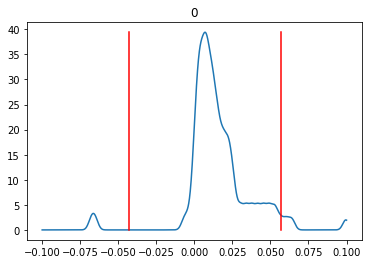

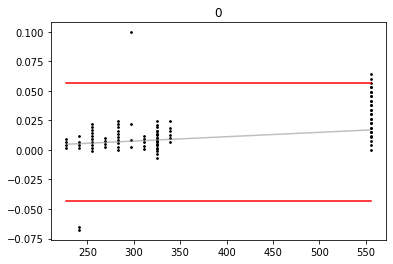

In [6]:
if __name__ == "__main__":
    tolerance = 0.10
    step = 0.002
    dalim = 0.05
    file = [x for x in os.listdir(datadir) if ".imzml" in x and "recal" not in x][0]
    print(file)
    SIMSIToolBox.recalibration.visualizeParameters(datadir + file,1,tolerance,mzsCorr,step,dalim)



In [18]:
if __name__ == "__main__":
    files = [x for x in os.listdir(datadir) if ".imzml" in x and "recal" not in x]
    for file in files:
        if file.replace(".imzml","_recal.imzML") not in os.listdir(datadir):
            print(file)
            SIMSIToolBox.recalibration.write_corrected_msi(datadir + file,datadir + file.replace(".imzml","_recal.imzML"),tolerance,mzsCorr,step,dalim,numCores=num_cores)



20221113_mt_tumor_brain2-3_05L_12C_20um_70-560mz Analyte 1_v2_1.imzml
reading spectra...

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\pyimzml\ontology\ontology.py:94: UserWarning: Accession MS:1000526 found with incorrect name "Waters raw file". Updating name to "Waters raw format".
  % (accession, raw_name, name)
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\pyimzml\ontology\ontology.py:94: UserWarning: Accession IMS:1000042 found with incorrect name "max count of pixel x". Updating name to "max count of pixels x".
  % (accession, raw_name, name)
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\pyimzml\ontology\ontology.py:94: UserWarning: Accession IMS:1000043 found with incorrect name "max count of pixel y". Updating name to "max count of pixels y".
  % (accession, raw_name, name)
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\pyimzml\ontology\ontology.py:94: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size". Updating name to "pixel size (x)".
  %

done
correcting spectra |██████████████████████████████████████████████████| 100.0% 
corrected 100.0% of pixels
writing spectra...done


In [7]:
mzs = []
keys = []
for index,row in peaklist.iterrows():
    _,_,nC = SIMSIToolBox.getMzsOfIsotopologues(row["formula"],"C")
    for x in range(nC+1):
        mzs.append(row["mz"] + 1.00336 * x)
        keys.append((index,x))
print(len(mzs))

376


In [8]:
inds = []
for index,row in peaklist.iterrows():
    tmp = [x for x in range(len(keys)) if keys[x][0] == index]
    tmp.sort(key=lambda x: keys[x][1])
    inds.append(tmp)
peaklist["inds"] = inds
peaklist

,datasetName,formula,adduct,chemMod,ion,mz,moleculeNames,moleculeIds,meanM0,clean,for_paper,ccs,inds
0,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C32H36N4O5,M-H,NaN,C32H36N4O5-H-,555.261215,Quinidine barbiturate,HMDB0015436,0.999988,1,0,-1.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C33H36N2O6,M-H,NaN,C33H36N2O6-H-,555.249982,Dipiperamide C,HMDB0039457,0.999691,1,0,-1.0,"[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4..."
2,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C14H28O2,M-H,NaN,C14H28O2-H-,227.201575,"12-Methyltridecanoic acid, Hexanal octane-1,3-...","HMDB0031072, HMDB0032318, HMDB0000806, HMDB000...",0.999609,1,0,-1.0,"[67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 7..."
3,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C3H6O3,M-H,NaN,C3H6O3-H-,89.024339,"Monoethyl carbonate, Dimethyl carbonate, Dihyd...","HMDB0031232, HMDB0029580, HMDB0001882, HMDB000...",0.999546,1,0,-1.0,"[82, 83, 84, 85]"
4,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C17H34O2,M-H,NaN,C17H34O2-H-,269.248525,"Nonyl octanoate, Heptadecanoic acid, (S)-14-Me...","HMDB0034131, HMDB0002259, HMDB0031067, HMDB003...",0.999047,1,0,-1.0,"[86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 9..."
5,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C15H30O2,M-H,NaN,C15H30O2-H-,241.217225,"Dodecyl propionate, Hexyl nonanoate, Pentadeca...","HMDB0032250, HMDB0032328, HMDB0000826, HMDB003...",0.998841,1,0,-1.0,"[104, 105, 106, 107, 108, 109, 110, 111, 112, ..."
6,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C19H22O3,M-H,NaN,C19H22O3-H-,297.149540,"Gravelliferone, 5-Hydroxy-7-(4-hydroxyphenyl)-...","HMDB0030729, HMDB0033711, HMDB0034054, HMDB004...",0.997415,1,0,-1.0,"[120, 121, 122, 123, 124, 125, 126, 127, 128, ..."
7,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C21H26O3,M-H,NaN,C21H26O3-H-,325.180840,"Isoacitretin, Acitretin","HMDB0003039, HMDB0014602",0.996826,1,0,-1.0,"[140, 141, 142, 143, 144, 145, 146, 147, 148, ..."
8,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C16H32O2,M-H,NaN,C16H32O2-H-,255.232875,"Butyl dodecanoate, Dodecyl butyrate, Hexyl dec...","HMDB0032065, HMDB0032249, HMDB0032324, HMDB000...",0.995917,1,1,168.7,"[162, 163, 164, 165, 166, 167, 168, 169, 170, ..."
9,20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...,C10H14N5O7P,M-H,NaN,C10H14N5O7P-H-,346.055729,"Adenosine monophosphate, 2'-Deoxyguanosine 5'-...","HMDB0000045, HMDB0001044, HMDB0003540, HMDB001...",0.994711,1,1,174.1,"[179, 180, 181, 182, 183, 184, 185, 186, 187, ..."


extracting intensities |██████████████████████████████████████████████████| 100.0% 
forming matrix |██████████████████████████████████████████████████| 100.0% 
Smoothing data |██████████████████████████████████████████████████| 100.0% 
correcting natural abundance |██████████████████████████████████████████████████| 100.0% 


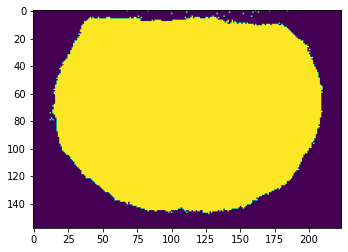

In [9]:
if __name__ == "__main__":
    msis = {}
    files = [x for x in os.listdir(datadir) if "_recal.imzML" in x]
    for file in files:
        msi = SIMSIToolBox.MSIData(mzs,ppm=ppmThresh,numCores = num_cores,intensityCutoff=intensityCutoff)
        msi.readimzML(datadir + file)
        msi.segmentImage(method=seg_method, num_latent=num_components, dm_method=dm_method,fill_holes = True)
        plt.close()
        plt.figure()
        plt.imshow(msi.imageBoundary)
        msi.smoothData(filtMethod,convSquare)
        msi.correctNaturalAbundance(peaklist["formula"].values,peaklist["inds"].values)
        msis[file] = msi



c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


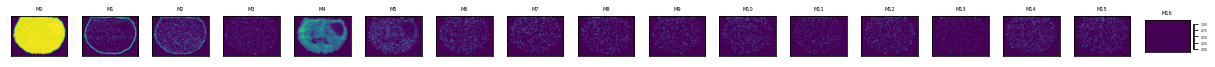

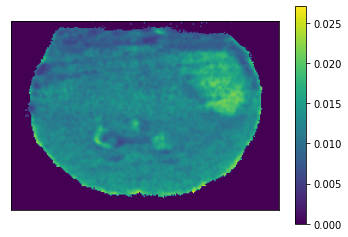

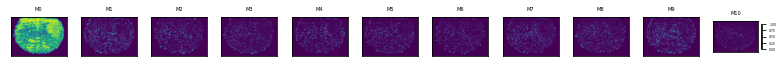

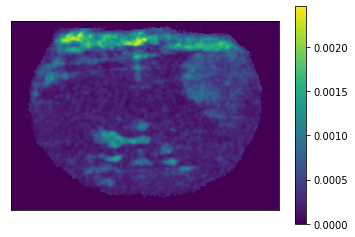

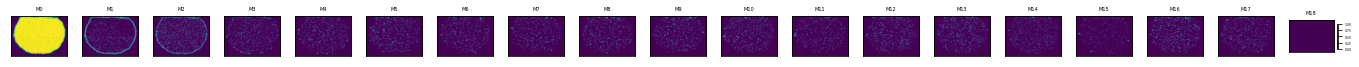

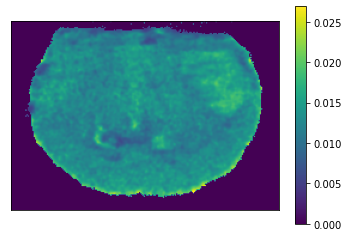

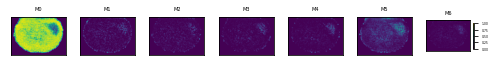

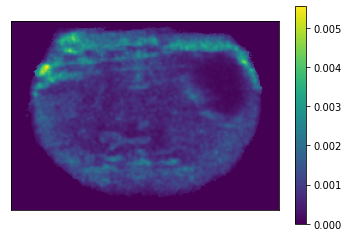

In [7]:
for fn in msis:
    try: os.mkdir(datadir + fn.replace(".imzML",""))
    except: pass
maxLabs = {"C16H32O2":[1.0 for x in range(2)] + [0.1 for x in range(15)],
           "C18H36O2":[1.0 for x in range(2)] + [0.1 for x in range(17)],
           "C6H9NO5":[1.0 for x in range(7)],
           "C10H14N5O7P":[1.0 for x in range(6)] + [0.2 for x in range(5)]}
badInds = {"C16H32O2":[1,4,5],
       "C18H36O2":[17],
       "C6H9NO5":[1],
       "C10H14N5O7P":[]}
for index,row2 in peaklist.iterrows():
    inds = row2["inds"]
    if row2["for_paper"] > 0.5:
        for fn in msis:
            fig, axes = plt.subplots(1,len(inds),figsize=(len(inds),1))
            tmp = msis[fn].data_tensor[inds]
            isoTensor = SIMSIToolBox.normalizeTensor(tmp)
            col = 0
            for img in isoTensor:
                tmp = axes[col].imshow(img,cmap=colormap)
                axes[col].set_xticks([])
                axes[col].set_yticks([])
                axes[col].set_title("M"+str(col),fontsize=5)
                if col == len(isoTensor) - 1:
                    cbar = plt.colorbar(tmp, ax=axes[col],shrink=0.5)
                    tmp.set_clim(0.0,1.0)
                    cbar.ax.tick_params(labelsize=3)
                col += 1
            
            plt.tight_layout()
            plt.savefig(datadir + fn.replace(".imzML","/") + row2["formula"] + "_iso_all.png")

            tmp = msis[fn].data_tensor[inds]
            isoTensor = SIMSIToolBox.normalizeTensor(tmp)
            maxLim = 1.0
            counter = 0
            for img in isoTensor:
                norm = plt.Normalize(vmin=0, vmax=maxLabs[row2["formula"]][counter])
                norm = colormap(norm(img))
                for row in range(norm.shape[0]):
                    for col in range(norm.shape[1]):
                        if msis[fn].imageBoundary[row,col] < .5:
                            norm[row,col,3] = 0
                plt.imsave(datadir + fn.replace(".imzML","/") + row2["formula"] + "_M" + str(counter) +".png",norm)#,cmap=colormap)
                counter += 1
            
            plt.figure()
            SIMSIToolBox.showImage(img,cmap = colormap)
            plt.clim(0,maxLim)
            plt.savefig(datadir + fn.replace(".imzML","/") + row2["formula"] + "_M" + str(counter-1) +"_withColorBar.png")
            plt.close()


            tmp = msis[fn].data_tensor[[inds[x] for x in range(len(inds)) if x not in badInds[row2["formula"]]]]
            poolSize = np.sum(tmp,axis=0)
            poolSize = poolSize / msis[fn].tic_image
            poolSize[msis[fn].imageBoundary < 0.5] = 0.0
            plt.figure()
            
            SIMSIToolBox.showImage(poolSize,cmap = colormap)
            maxLim = np.max(poolSize)
            plt.clim(0,maxLim)
            norm = plt.Normalize(vmin=0, vmax=maxLim)
            norm = colormap(norm(poolSize))
            for row in range(norm.shape[0]):
                for col in range(norm.shape[1]):
                    if msis[fn].imageBoundary[row,col] < .5:
                        norm[row,col,3] = 0
            plt.imsave(datadir + fn.replace(".imzML","/") + row2["formula"] + "_pool.png",norm)#,cmap=colormap)
            plt.savefig(datadir + fn.replace(".imzML","/") + row2["formula"] + "_pool_with_colorbar.png")


In [11]:
pkl.dump([peaklist,msis],open(datadir + "processed_data.pkl","wb"))

In [6]:
[peaklist,msis] = pkl.load(open(datadir + "processed_data.pkl","rb"))